# Sequential Chats and Customer Onboarding

In [1]:
#Setup 
from dotenv import load_dotenv

import os

load_dotenv()
API_KEY = os.getenv("OPENAI_KEY")


In [2]:
from autogen import ConversableAgent
llm_config = {"model": "gpt-3.5-turbo", "api_key": API_KEY}


## Creating the needed agents:

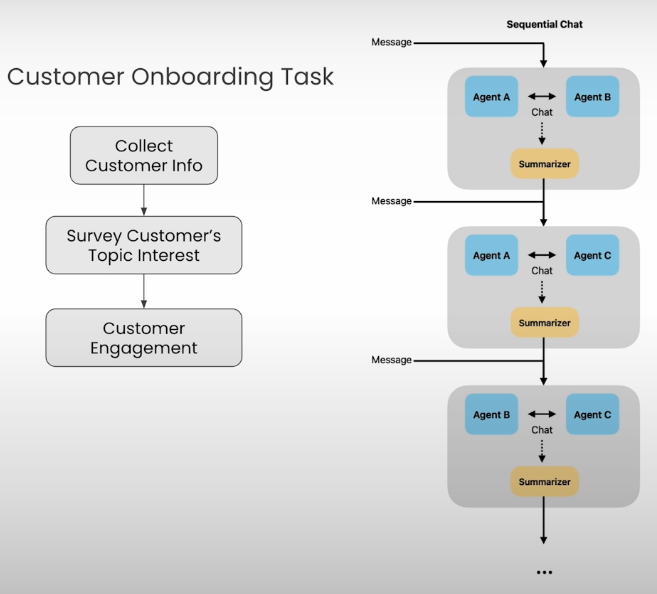

In [3]:
from IPython.display import Image
Image(filename='../assets/sequential_chats.png')


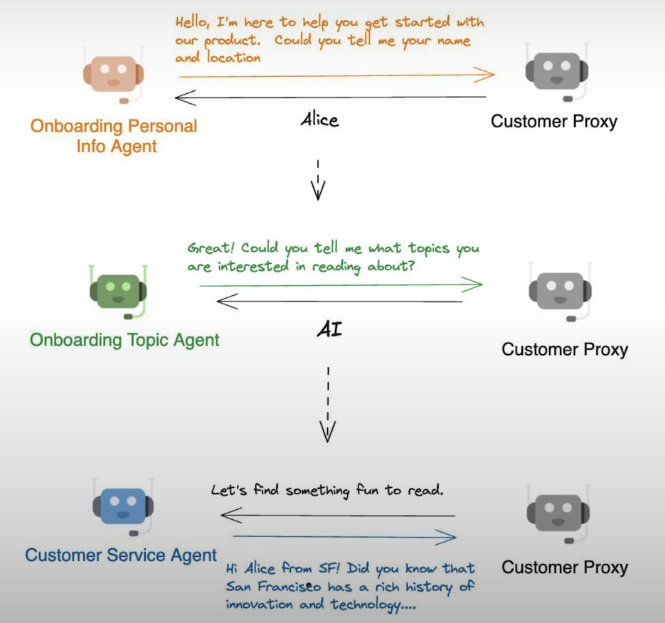

In [4]:
Image(filename='../assets/sequential_chats_2.png')

## Creating the Needed Agents:


In [5]:

onboarding_personal_information_agent = ConversableAgent(
    name="Onboarding Personal Information Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's name and location.
    Do not ask for other information. Return 'TERMINATE' 
    when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [6]:
onboarding_topic_preference_agent = ConversableAgent(
    name="Onboarding Topic preference Agent",
    system_message='''You are a helpful customer onboarding agent,
    you are here to help new customers get started with our product.
    Your job is to gather customer's preferences on news topics.
    Do not ask for other information.
    Return 'TERMINATE' when you have gathered all the information.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
)

In [7]:
customer_engagement_agent = ConversableAgent(
    name="Customer Engagement Agent",
    system_message='''You are a helpful customer service agent
    here to provide fun for the customer based on the user's
    personal information and topic preferences.
    This could include fun facts, jokes, or interesting stories.
    Make sure to make it engaging and fun!
    Return 'TERMINATE' when you are done.''',
    llm_config=llm_config,
    code_execution_config=False,
    human_input_mode="NEVER",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

In [8]:
customer_proxy_agent = ConversableAgent(
    name="customer_proxy_agent",
    llm_config=False,
    code_execution_config=False,
    human_input_mode="ALWAYS",
    is_termination_msg=lambda msg: "terminate" in msg.get("content").lower(),
)

# Creating Tasks:

In [9]:
chats = [
    {
        "sender": onboarding_personal_information_agent,
        "recipient": customer_proxy_agent,
        "message": 
            "Hello, I'm here to help you get started with our product."
            "Could you tell me your name and location?",
        "summary_method": "reflection_with_llm",
        "summary_args": {#As agents need to answer based on the user's input, we need to summarize the chats
            "summary_prompt" : "Return the customer information "
                             "into as JSON object only: "
                             "{'name': '', 'location': ''}",
        },
        "max_turns": 2,
        "clear_history" : True
    },
    {
        "sender": onboarding_topic_preference_agent,
        "recipient": customer_proxy_agent,
        "message": 
                "Great! Could you tell me what topics you are "
                "interested in reading about?",
        "summary_method": "reflection_with_llm",
        "max_turns": 1,
        "clear_history" : False
    },
    {
        "sender": customer_proxy_agent,
        "recipient": customer_engagement_agent,
        "message": "Let's find something fun to read.",
        "max_turns": 1,
        "summary_method": "reflection_with_llm",
    },
]

Start the onboarding process:

In [10]:
from autogen import initiate_chats
chat_results = initiate_chats(chats)


********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Personal Information Agent (to customer_proxy_agent):

Hello, I'm here to help you get started with our product.Could you tell me your name and location?

--------------------------------------------------------------------------------


/Users/martinmoreno/Documents/proyects/autogen-agentic-design/.venv/lib/python3.11/site-packages/autogen/agentchat/chat.py:47: UserWarning: Repetitive recipients detected: The chat history will be cleared by default if a recipient appears more than once. To retain the chat history, please set 'clear_history=False' in the configuration of the repeating agent.
  warnings.warn(


customer_proxy_agent (to Onboarding Personal Information Agent):

Rudolf

--------------------------------------------------------------------------------
Onboarding Personal Information Agent (to customer_proxy_agent):

Thank you, and may I know your location, please?

--------------------------------------------------------------------------------
customer_proxy_agent (to Onboarding Personal Information Agent):

Germany

--------------------------------------------------------------------------------

********************************************************************************
Starting a new chat....

********************************************************************************
Onboarding Topic preference Agent (to customer_proxy_agent):

Great! Could you tell me what topics you are interested in reading about?
Context: 
{'name': 'Rudolf', 'location': 'Germany'}

--------------------------------------------------------------------------------
customer_proxy_agent (to Onboardin

# Print out the summary

In [11]:
for chat_result in chat_results:
    print(chat_result.summary)
    print("\n")

{'name': 'Rudolf', 'location': 'Germany'}


Rudolf from Germany is interested in reading about topics related to ML, AI, and Data Science.


Rudolf from Germany is interested in reading about topics related to ML, AI, and Data Science, and was encouraged to continue exploring these fascinating fields given Germany's historical contributions to technology.




# Print out the cost

In [12]:
for chat_result in chat_results:
    print(chat_result.cost)
    print("\n")

{'usage_including_cached_inference': {'total_cost': 0.0001295, 'gpt-3.5-turbo-0125': {'cost': 0.0001295, 'prompt_tokens': 181, 'completion_tokens': 26, 'total_tokens': 207}}, 'usage_excluding_cached_inference': {'total_cost': 0.0001295, 'gpt-3.5-turbo-0125': {'cost': 0.0001295, 'prompt_tokens': 181, 'completion_tokens': 26, 'total_tokens': 207}}}


{'usage_including_cached_inference': {'total_cost': 6.6e-05, 'gpt-3.5-turbo-0125': {'cost': 6.6e-05, 'prompt_tokens': 69, 'completion_tokens': 21, 'total_tokens': 90}}, 'usage_excluding_cached_inference': {'total_cost': 6.6e-05, 'gpt-3.5-turbo-0125': {'cost': 6.6e-05, 'prompt_tokens': 69, 'completion_tokens': 21, 'total_tokens': 90}}}


{'usage_including_cached_inference': {'total_cost': 0.00037799999999999997, 'gpt-3.5-turbo-0125': {'cost': 0.00037799999999999997, 'prompt_tokens': 309, 'completion_tokens': 149, 'total_tokens': 458}}, 'usage_excluding_cached_inference': {'total_cost': 0.00037799999999999997, 'gpt-3.5-turbo-0125': {'cost': 0.